In [1]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [102]:
df = pd.read_csv('GradesAllF.csv')

#Convert % strings to floats
df['PCT A'] = df['PCT A'].str.rstrip('%').astype('float')
df['PCT B'] = df['PCT B'].str.rstrip('%').astype('float')
df['PCT C'] = df['PCT C'].str.rstrip('%').astype('float')
df['PCT <C'] = df['PCT C MINUS OR BELOW'].str.rstrip('%').astype('float')
df['PCT DF'] = df['PCT DF'].str.rstrip('%').astype('float')
df['PCT DFW'] = df['PCT DFW'].str.rstrip('%').astype('float')

df['College'] = df['CrsPBAColl']
df['Division'] = df['CrsPBADiv']
df = df.drop('CrsPBAColl', axis=1)
df = df.drop('CrsPBADiv', axis=1)

#Calculations
df['Level'] = np.floor(df.Course / 1000) * 1000
df['PCT W'] = df['PCT DFW'] - df['PCT DF']

#Cleaning
df = df.drop('PCT C MINUS OR BELOW', axis=1)
df = df[df.College.isin(['AS','EN'])]

df.loc[df.College == 'EN', 'Division'] = 'ENG'

#SubSets

undergrad = df.loc[df.Level<5001]

AS = undergrad.loc[undergrad.College.isin(['AS'])]

art_and_history = AS.loc[AS.Division.isin(['AH'])]
natural_sciences = AS.loc[AS.Division.isin(['NS'])]
social_sciences = AS.loc[AS.Division.isin(['SS'])]

engineering = undergrad.loc[undergrad.College.isin(['EN'])]

print(df.columns)
df.head()

Index(['Subject', 'Course', 'Avg Enrl', 'Total Enrl', 'Avg Grade', 'Avg Hours',
       'PCT A', 'PCT B', 'PCT C', 'PCT DF', 'PCT DFW', 'Workload Raw',
       'Avg Course', 'Avg Instructor', 'Avg N_Ret', 'Sections', 'Total N_Ret',
       'PCT <C', 'College', 'Division', 'Level', 'PCT W'],
      dtype='object')


,Subject,Course,Avg Enrl,Total Enrl,Avg Grade,Avg Hours,PCT A,PCT B,PCT C,PCT DF,...,Avg Course,Avg Instructor,Avg N_Ret,Sections,Total N_Ret,PCT <C,College,Division,Level,PCT W
74,ARAB,1010,19,577,3.25,5.0,53.0,29.0,12.0,5.0,...,5.07,5.19,12.0,31,373.0,8.0,AS,AH,1000.0,8.0
75,ARAB,1011,43,340,3.22,3.0,51.0,33.0,11.0,5.0,...,4.64,4.88,30.5,8,244.0,7.0,AS,AH,1000.0,3.0
76,ARAB,1020,17,355,3.38,5.0,61.0,25.0,10.0,5.0,...,5.13,5.26,10.0,21,211.0,6.0,AS,AH,1000.0,3.0
77,ARAB,2110,18,233,3.38,3.6,57.0,30.0,10.0,3.0,...,4.75,5.00,13.2,13,171.0,4.0,AS,AH,2000.0,6.0
78,ARAB,2120,17,153,3.57,3.2,72.0,20.0,5.0,2.0,...,4.62,4.79,10.2,9,92.0,4.0,AS,AH,2000.0,3.0


In [3]:
df.describe()

,Course,Avg Enrl,Total Enrl,Avg Grade,Avg Hours,PCT A,PCT B,PCT C,PCT DF,PCT DFW,Workload Raw,Avg Course,Avg Instructor,Avg N_Ret,Sections,Total N_Ret,PCT <C,Level,PCT W
count,3655.000000,3655.00000,3655.000000,3624.000000,3655.000000,3624.000000,3624.000000,3624.000000,3624.000000,3624.000000,3539.000000,3539.000000,3539.000000,3553.000000,3655.000000,3553.000000,3624.000000,3655.000000,3624.000000
mean,3968.649795,31.99617,411.661286,3.357050,2.970807,56.654525,30.762969,9.088300,3.470199,6.134934,2.838994,4.892780,5.173021,22.862201,9.548290,281.424712,5.303532,3638.030096,2.664735
std,1587.669753,30.73470,1056.112623,0.382973,0.603836,24.001020,15.987155,9.097135,4.200692,5.768489,0.744856,0.514109,0.493238,19.033030,13.383927,631.847336,5.925616,1521.971345,2.761754
min,1000.000000,10.00000,10.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.940000,2.000000,0.000000,1.000000,0.000000,0.000000,1000.000000,0.000000
25%,3022.500000,15.00000,39.000000,3.070000,3.000000,37.000000,19.000000,0.000000,0.000000,2.000000,2.300000,4.600000,4.890000,12.000000,2.000000,31.000000,0.000000,3000.000000,0.000000
50%,4109.000000,21.00000,115.000000,3.360000,3.000000,54.000000,33.000000,7.000000,2.000000,5.000000,2.700000,4.940000,5.250000,16.300000,5.000000,89.000000,4.000000,4000.000000,2.000000
75%,5012.000000,36.00000,351.500000,3.660000,3.000000,76.000000,42.000000,15.000000,5.000000,9.000000,3.300000,5.240000,5.520000,26.600000,11.000000,269.000000,8.000000,5000.000000,4.000000
max,8990.000000,323.00000,22854.000000,4.000000,7.000000,100.000000,89.000000,51.000000,33.000000,43.000000,6.000000,6.000000,6.000000,198.000000,99.000000,12600.000000,39.000000,8000.000000,26.000000


AP = ???

AS = Arts & Sciences

BU = Business (and management?)

EB = Education (and leadership?)

EN = Engineering

GR, JR = ???

LW = Law

MB = Music?

XX = ??

CM = Communications

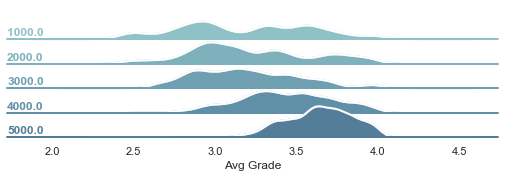

In [16]:
sns.set(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})

# Initialize the FacetGrid object
pal = sns.cubehelix_palette(10, rot=-.25, light=.7)
g = sns.FacetGrid(engineering, row="Level", hue="Level", aspect=15, height=.5, palette=pal)

# Draw the densities in a few steps
g.map(sns.kdeplot, "Avg Grade", clip_on=False, shade=True, alpha=1, lw=1.5, bw=.2)
g.map(sns.kdeplot, "Avg Grade", clip_on=False, color="w", lw=2, bw=.2)
g.map(plt.axhline, y=0, lw=2, clip_on=False)


# Define and use a simple function to label the plot in axes coordinates
def label(x, color, label):
    ax = plt.gca()
    ax.text(0, .2, label, fontweight="bold", color=color,
            ha="left", va="center", transform=ax.transAxes)

g.map(label, "Avg Grade")

# Set the subplots to overlap
g.fig.subplots_adjust(hspace=-.25)

# Remove axes details that don't play well with overlap
g.set_titles("")
g.set(yticks=[])
g.despine(bottom=True, left=True)


# Distribution of grades in Engineering Classes by class Level

We get better with time. Those who excel stay for more in 5000 level Graduate classes.

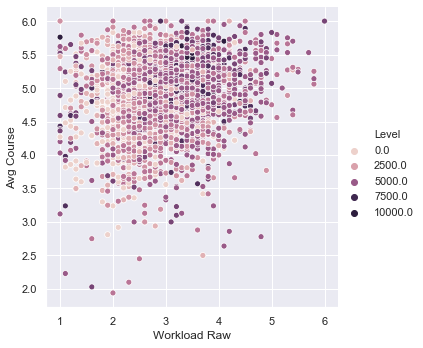

In [73]:
sns.set(style="darkgrid")
sns.relplot(x='Workload Raw', y='Avg Course',sizes=(15,200),hue='Level',data=df)

# Better courses can have more work

or we are just more willing to work longer hours

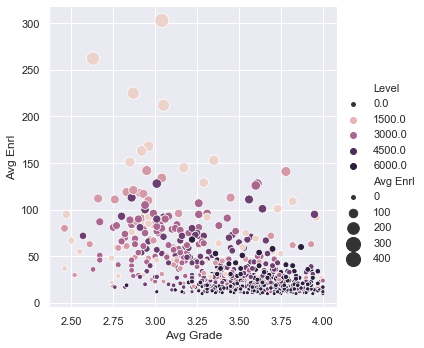

In [80]:
sns.set(style="darkgrid")
sns.relplot(x='Avg Grade', y='Avg Enrl', size='Avg Enrl',sizes=(15,200),hue='Level',data=engineering)

# Large class sizes have lower grade averages

In [91]:
#g = sns.FacetGrid(engineering, col="Level",  row="Subject")
for majors in df.Subject.unique():
    major = df[(df.Subject == majors) & (df.Level > 2000)]
    print(majors, major['Avg Grade'].mean())

ARAB 3.33
ARTF 4.0
ARTH 3.129512195121951
ARTS 3.5854166666666667
ASIA 3.48
CAMW 3.04
CHIN 3.5683333333333334
CLAS 3.4339215686274516
COML 3.903333333333333
CWCV nan
DANE nan
DNCE 3.6189743589743593
EALC nan
ENGL 3.454
FILM 3.3438095238095236
FREN 3.5220689655172412
FRSI 3.97
GREK 3.8000000000000003
GRMN 3.4297058823529416
GSLL 3.31
HEBR 3.276
HIND 3.396
HIST 3.1114545454545453
HNDI nan
HUMN 3.2670000000000003
INDO nan
ITAL 3.155217391304348
JPNS 3.3903571428571433
JWST 3.1733333333333333
KREN 3.8
LATN 3.87
LGBT 3.15
LIBB nan
MEMS nan
PHIL 3.4016666666666673
PORT 3.3625000000000003
RLST 3.321153846153846
RUSS 3.2804
SCAN 3.0566666666666666
SPAN 3.3553488372093025
SSIR nan
SWED nan
THTR 3.594545454545454
WRTG 3.6300000000000003
APPM 3.477631578947368
ASTR 3.4313333333333333
ATOC 3.404074074074074
BAKR nan
CHEM 3.324375
EBIO 3.4190566037735852
ENST 3.7925
ENVM 3.92
ENVS 3.5055555555555555
GEOG 3.3282608695652174
GEOL 3.349411764705882
IPHY 3.2482608695652173
MATH 3.3982456140350874
MCDB 